<h2>5.1 SciPy intro

In [1]:
from scipy import stats

In [2]:
num_heads = 16
num_flips = 20
prob_head = 0.5
prob = stats.binom_test(num_heads, num_flips, prob_head)
print(f"Probability of observing more than 15 heads or 15 tails is {prob:.17f}")

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


In [3]:
prob_16_heads = stats.binom.pmf(num_heads, num_flips, prob_head)
print(f"The probability of seeing {num_heads} of {num_flips} heads is {prob_16_heads}")

The probability of seeing 16 of 20 heads is 0.004620552062988271


In [4]:
probabilities = stats.binom.pmf([4, 16], num_flips, prob_head)
assert probabilities.tolist() == [prob_16_heads] * 2

In [5]:
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, prob_head)
total_prob = probabilities.sum()
print(f"Total sum of probabilities equals {total_prob:.14f}")

Total sum of probabilities equals 1.00000000000000


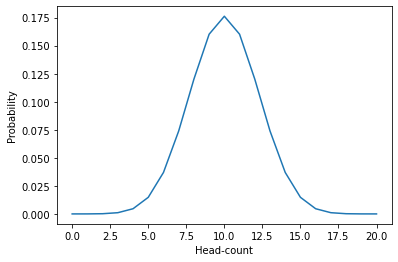

In [6]:
import matplotlib.pyplot as plt
plt.plot(interval_all_counts, probabilities)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

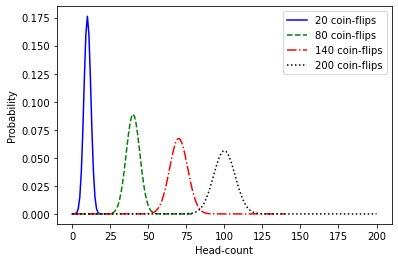

In [7]:
flip_counts = [20, 80, 140, 200]
linestyles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'k']

for num_flips, linestyle, color in zip(flip_counts, linestyles, colors):
    x_values = range(num_flips + 1)
    y_values = stats.binom.pmf(x_values, num_flips, 0.5)
    plt.plot(x_values, y_values, linestyle=linestyle, color=color,
             label=f'{num_flips} coin-flips')
plt.legend()
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

<h2>5.2 Mean and Measure

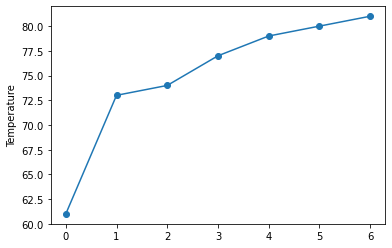

In [8]:
import numpy as np
measurements = np.array([80, 77, 73, 61, 74, 79, 81])
measurements.sort()
number_of_days = measurements.size
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.ylabel('Temperature')
plt.show()

In [9]:
difference = measurements.max() - measurements.min()
midpoint = measurements.min() + difference / 2
assert midpoint == (measurements.max() + measurements.min()) / 2
print(f"The midpoint temperature is {midpoint} degrees")

The midpoint temperature is 71.0 degrees


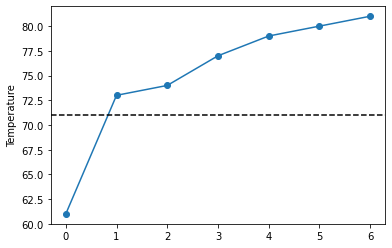

In [10]:
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--')
plt.ylabel('Temperature')
plt.show()

The median temperature is 77 degrees


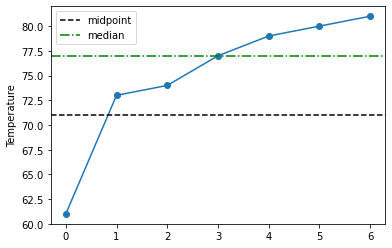

In [11]:
median = measurements[3]
print(f"The median temperature is {median} degrees")
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--', label='midpoint')
plt.axhline(median, color='g', linestyle='-.', label='median')
plt.legend()
plt.ylabel('Temperature')
plt.show()

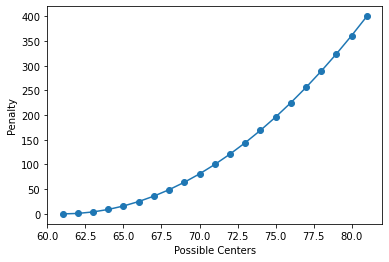

In [12]:
def squared_distance(value1, value2):
    return (value1 - value2) ** 2

possible_centers = range(measurements.min(), measurements.max() + 1)
penalties = [squared_distance(center, 61) for center in possible_centers]
plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel('Possible Centers')
plt.ylabel('Penalty')
plt.show()

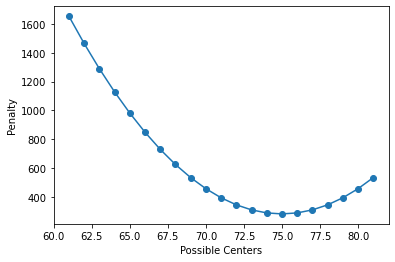

In [13]:
def sum_of_squared_distances(value, measurements):
    return sum(squared_distance(value, m) for m in measurements)

penalties = [sum_of_squared_distances(center, measurements)
             for center in possible_centers]
plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel('Possible Centers')
plt.ylabel('Penalty')
plt.show()

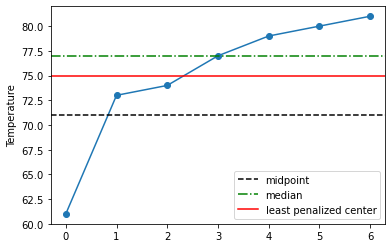

In [14]:
least_penalized = 75
assert least_penalized == possible_centers[np.argmin(penalties)]

plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--', label='midpoint')
plt.axhline(median, color='g', linestyle='-.', label='median')
plt.axhline(least_penalized, color='r', linestyle='-',
            label='least penalized center')
plt.legend()
plt.ylabel('Temperature')
plt.show()

In [15]:
assert measurements.sum() / measurements.size == least_penalized
mean = measurements.mean()
assert mean == least_penalized
assert mean == np.mean(measurements)
assert mean == np.average(measurements)

In [16]:
equal_weights = [1] * 7
assert mean == np.average(measurements, weights=equal_weights)

unequal_weights = [100] + [1] * 6
assert mean != np.average(measurements, weights=unequal_weights)

In [17]:
weighted_mean = np.average([75, 77], weights=[9, 1])
print(f"The mean is {weighted_mean}")
assert weighted_mean == np.mean(9 * [75] + [77]) == weighted_mean

The mean is 75.2


The mean of the Binomial is 10.00 heads


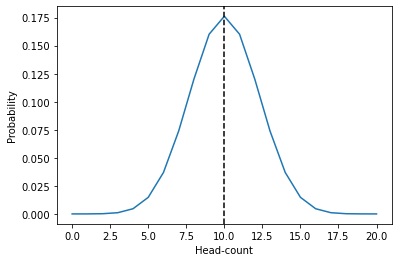

In [18]:
num_flips = 20
interval_all_counts = range(num_flips + 1)
probabilities = stats.binom.pmf(interval_all_counts, 20, prob_head)
mean_binomial = np.average(interval_all_counts, weights=probabilities)
print(f"The mean of the Binomial is {mean_binomial:.2f} heads")
plt.plot(interval_all_counts, probabilities)
plt.axvline(mean_binomial, color='k', linestyle='--')
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

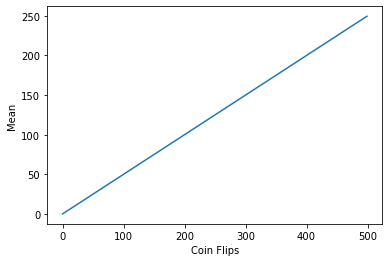

In [19]:
means = [stats.binom.mean(num_flips, 0.5) for num_flips in range(500)]
plt.plot(range(500), means)
plt.xlabel('Coin Flips')
plt.ylabel('Mean')
plt.show()

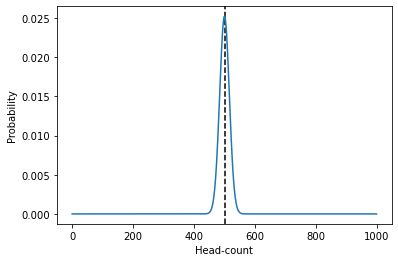

In [20]:
num_flips = 1000
assert stats.binom.mean(num_flips, 0.5) == 500

interval_all_counts = range(num_flips)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, 0.5)
plt.axvline(500, color='k', linestyle='--')
plt.plot(interval_all_counts, probabilities)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

<h2>5.3 Variance

In [21]:
california = np.array([52, 77, 96])
kentucky = np.array([71, 75, 79])

print(f"Mean California temperature is {california.mean()}")
print(f"Mean Kentucky temperatures is {california.mean()}")

Mean California temperature is 75.0
Mean Kentucky temperatures is 75.0


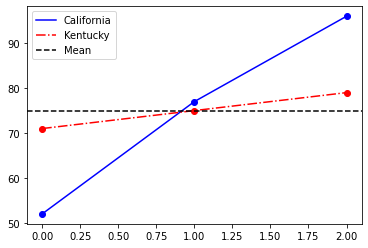

In [22]:
plt.plot(range(3), california, color='b', label='California')
plt.scatter(range(3), california, color='b')
plt.plot(range(3), kentucky, color='r', linestyle='-.', label='Kentucky')
plt.scatter(range(3), kentucky, color='r')
plt.axhline(75, color='k', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [23]:
def sum_of_squares(data):
    mean = np.mean(data)
    return sum(squared_distance(value, mean) for value in data)

california_sum_squares = sum_of_squares(california)
print(f"California's sum of squares is {california_sum_squares}")
kentucky_sum_squares = sum_of_squares(kentucky)
print(f"Kentucky's sum of squares is {kentucky_sum_squares}")

California's sum of squares is 974.0
Kentucky's sum of squares is 32.0


In [24]:
california_duplicated = np.array(california.tolist() * 2)
duplicated_sum_squares = sum_of_squares(california_duplicated)
print(f"Duplicated California sum of squares is {duplicated_sum_squares}")
assert duplicated_sum_squares == 2 * california_sum_squares

Duplicated California sum of squares is 1948.0


In [25]:
value1 = california_sum_squares / california.size
value2 = duplicated_sum_squares / california_duplicated.size
assert value1 == value2

def variance(data):
    mean = np.mean(data)
    return np.mean([squared_distance(value, mean) for value in data])

assert variance(california) == california_sum_squares / california.size
assert variance(california) == variance(california_duplicated)

In [26]:
california_variance = variance(california)
kentucky_variance = variance(kentucky)
print(f"California Variance is {california_variance}")
print(f"Kentucky Variance is {kentucky_variance}")

California Variance is 324.6666666666667
Kentucky Variance is 10.666666666666666


In [27]:
assert california_variance == california.var()
assert california_variance == np.var(california)

In [28]:
def weighted_variance(data, weights):
    mean = np.average(data, weights=weights)
    squared_distances = [squared_distance(value, mean) for value in data]
    return np.average(squared_distances, weights=weights)

assert weighted_variance([75, 77], [9, 1]) == np.var(9 * [75] + [77])

<h2>5.3.1

In [29]:
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, 20, prob_head)
variance_binomial = weighted_variance(interval_all_counts, probabilities)
print(f"The variance of the Binomial is {variance_binomial:.2f} heads")

The variance of the Binomial is 5.00 heads


In [30]:
assert stats.binom.var(20, prob_head) == 5.0
assert stats.binom.var(20, prob_head) == stats.binom.mean(20, prob_head) / 2

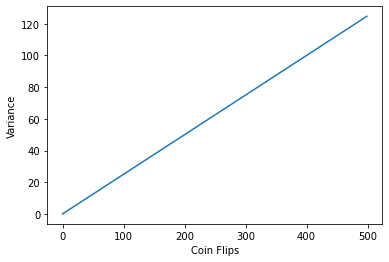

In [31]:
variances = [stats.binom.var(num_flips, prob_head)
             for num_flips in range(500)]
plt.plot(range(500), variances)
plt.xlabel('Coin Flips')
plt.ylabel('Variance')
plt.show()

In [32]:
data = [1, 2, 3]
standard_deviation = np.std(data)
assert standard_deviation ** 2 == np.var(data)

<h1>6 Making Predictions Using the Central Limit Theorem and SciPy

In [33]:
np.random.seed(0)
sample_size = 10000
sample = np.array([np.random.binomial(1, 0.5) for _ in range(sample_size)])
head_count = sample.sum()
head_count_frequency = head_count / sample_size
assert head_count_frequency == sample.mean()

In [34]:
np.random.seed(0)
frequencies = np.random.binomial(sample_size, 0.5, 100000) / sample_size

In [35]:
frequencies

array([0.5002, 0.5028, 0.4991, ..., 0.4979, 0.4992, 0.4996])

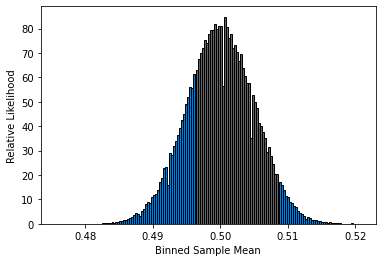

In [36]:
sample_means = frequencies
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto',
                                     edgecolor='black', density=True)
plt.xlabel('Binned Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

In [37]:
mean_normal = np.average(bin_edges[:-1], weights=likelihoods)
var_normal = weighted_variance(bin_edges[:-1], likelihoods)
std_normal = var_normal ** 0.5
print(f"Mean is approximately {mean_normal:.2f}")
print(f"Standard deviation is approximately {std_normal:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


In [38]:
import math
peak_x_value = bin_edges[likelihoods.argmax()]
print(f"Mean is approximately {peak_x_value:.2f}")
peak_y_value = likelihoods.max()
std_from_peak = (peak_y_value * (2* math.pi) ** 0.5) ** -1
print(f"Standard deviation is approximately {std_from_peak:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


In [39]:
fitted_mean, fitted_std = stats.norm.fit(sample_means)
print(f"Mean is approximately {fitted_mean:.2f}")
print(f"Standard deviation is approximately  {fitted_std:.3f}")

Mean is approximately 0.50
Standard deviation is approximately  0.005


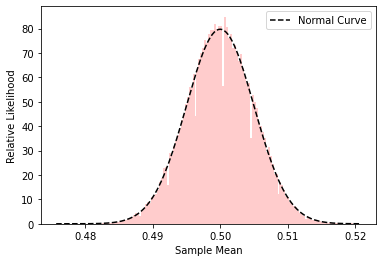

In [40]:
normal_likelihoods = stats.norm.pdf(bin_edges, fitted_mean, fitted_std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--',
         label='Normal Curve')
plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
plt.legend()
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

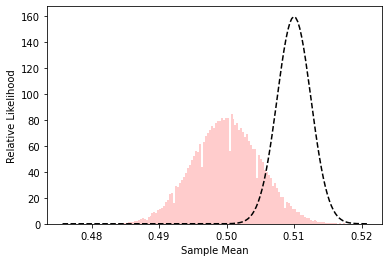

In [41]:
adjusted_likelihoods = stats.norm.pdf(bin_edges, fitted_mean + 0.01,
                                      fitted_std / 2)
plt.plot(bin_edges, adjusted_likelihoods, color='k', linestyle='--')
plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

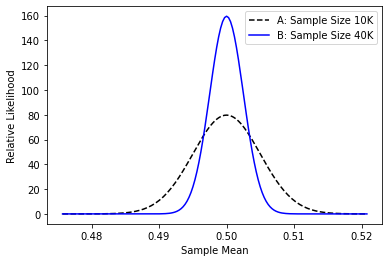

In [42]:
np.random.seed(0)
new_sample_size = 40000
new_head_counts = np.random.binomial(new_sample_size, 0.5, 100000)
new_mean, new_std = stats.norm.fit(new_head_counts / new_sample_size)
new_likelihoods = stats.norm.pdf(bin_edges, new_mean, new_std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--',
         label='A: Sample Size 10K')
plt.plot(bin_edges, new_likelihoods, color='b', label='B: Sample Size 40K')
plt.legend()
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

In [43]:
mean, std = new_mean, new_std
start, end = stats.norm.interval(0.95, mean, std)
print(f"The true mean of the sampled binomial distribution is between {start:.3f} and {end:.3f}")

The true mean of the sampled binomial distribution is between 0.495 and 0.505


In [44]:
assert stats.binom.mean(1, 0.5) == 0.5

In [45]:
variance_ratio = (new_std ** 2) / (fitted_std ** 2)
print(f"The ratio of variances is approximately {variance_ratio:.2f}")

The ratio of variances is approximately 0.25


In [46]:
np.random.seed(0)
reduced_sample_size = 2500
head_counts = np.random.binomial(reduced_sample_size, 0.5, 100000)
_, std = stats.norm.fit(head_counts / reduced_sample_size)
variance_ratio = (std ** 2) / (fitted_std ** 2)
print(f"The ratio of variances is approximately {variance_ratio:.1f}")

The ratio of variances is approximately 4.0


In [47]:
estimated_variance = (fitted_std ** 2) * 10000
print(f"Estimated variance for a sample size of 1 is {estimated_variance:.2f}")

Estimated variance for a sample size of 1 is 0.25


<h2>6.2  Determining Mean and Variance of a Population through Random Sampling

In [48]:
np.random.seed(0)
population_ages = np.random.randint(1, 85, size=50000)
population_mean = population_ages.mean()
population_variance = population_ages.var()

In [49]:
np.random.seed(0)
sample_size = 10
sample = np.random.choice(population_ages, size=sample_size)
sample_mean = sample.mean()

In [50]:
percent_diff = lambda v1, v2: 100 * abs(v1 - v2) / v2
percent_diff_means = percent_diff(sample_mean, population_mean)
print(f"There is a {percent_diff_means:.2f} percent difference between means.")

There is a 27.59 percent difference between means.


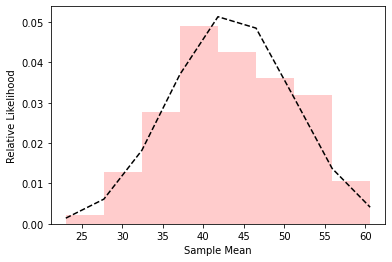

In [51]:
np.random.seed(0)
sample_means = [np.random.choice(population_ages, size=sample_size).mean()
                for _ in range(100)]
likelihoods, bin_edges, _  = plt.hist(sample_means, bins='auto', alpha=0.2,
                                      color='r', density=True)
mean, std = stats.norm.fit(sample_means)
normal_likelihoods = stats.norm.pdf(bin_edges, mean, std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--')
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

In [52]:
print(f"Actual population mean is approximately {population_mean:.2f}")
percent_diff_means = percent_diff(mean, population_mean)
print(f"There is a {percent_diff_means:.2f}% difference between means.")

Actual population mean is approximately 42.53
There is a 2.17% difference between means.


In [53]:
normal_variance = std ** 2
estimated_variance = normal_variance * sample_size
print(f"Estimated variance is approximately {estimated_variance:.2f}")
print(f"Actual population variance is approximately {population_variance:.2f}")
percent_diff_var = percent_diff(estimated_variance, population_variance)
print(f"There is a {percent_diff_var:.2f} percent difference between variances.")

Estimated variance is approximately 576.73
Actual population variance is approximately 584.33
There is a 1.30 percent difference between variances.


<h2>6.3  Making Predictions Using Mean and Variance

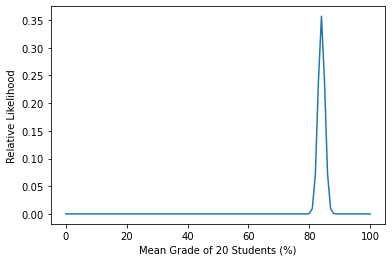

In [54]:
population_mean = 84
population_variance = 25
mean = population_mean
sem = (population_variance / 20) ** 0.5
grade_range = range(101)
normal_likelihoods = stats.norm.pdf(grade_range, mean, sem)
plt.plot(grade_range, normal_likelihoods)
plt.xlabel('Mean Grade of 20 Students (%)')
plt.ylabel('Relative Likelihood')
plt.show()

In [55]:
total_area = np.sum([normal_likelihoods[i: i + 2].sum() / 2
                    for i in range(normal_likelihoods.size - 1)])

assert total_area == np.trapz(normal_likelihoods)
print(f"Estimated area under the curve is {total_area}")

Estimated area under the curve is 1.0000000000384808


In [56]:
assert stats.norm.sf(0, mean, sem) == 1.0
assert stats.norm.sf(mean, mean, sem) == 0.5
estimated_area = np.trapz(normal_likelihoods[mean:])
print(f"Estimated area beyond the mean is {estimated_area}")

Estimated area beyond the mean is 0.5000000000192404


In [57]:
area  = stats.norm.sf(90, mean, sem)
print(f"Probability of 20 students acing the exam is {area}")

Probability of 20 students acing the exam is 4.012555633463782e-08


<h1>7 Statistical Hypothesis Testing

In [58]:
population_mean = 80
population_variance = 100
mean = population_mean
sem = (population_variance / 18) ** 0.5
prob_high_grade = stats.norm.sf(84, mean, sem)
print(f"Probability of an average grade >= 84 is {prob_high_grade}")

Probability of an average grade >= 84 is 0.044843010885182284


In [59]:
prob_low_grade = stats.norm.cdf(76, mean, sem)
print(f"Probability of an average grade <= 76 is {prob_low_grade}")


Probability of an average grade <= 76 is 0.044843010885182284


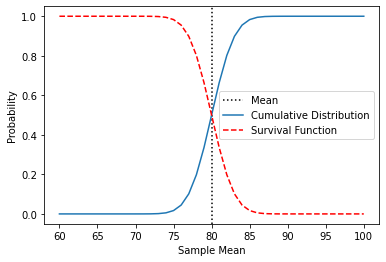

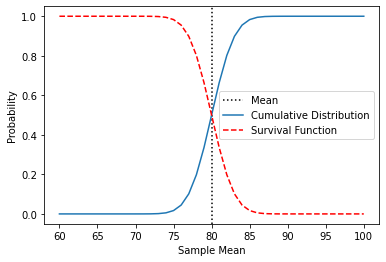

In [60]:
for x in range(-100, 100):
    sf_value = stats.norm.sf(mean + x, mean,  sem)
    assert sf_value == stats.norm.cdf(mean - x, mean, sem)

plt.axvline(mean, color='k', label='Mean', linestyle=':')
x_values = range(60, 101)
plt.plot(x_values, stats.norm.cdf(x_values, mean, sem),
         label='Cumulative Distribution')
plt.plot(x_values, stats.norm.sf(x_values, mean, sem),
         label='Survival Function', linestyle='--', color='r')
plt.xlabel('Sample Mean')
plt.ylabel('Probability')
plt.legend()
plt.show()

plt.axvline(mean, color='k', label='Mean', linestyle=':')
x_values = range(60, 101)
plt.plot(x_values, stats.norm.cdf(x_values, mean, sem),
         label='Cumulative Distribution')
plt.plot(x_values, stats.norm.sf(x_values, mean, sem),
         label='Survival Function', linestyle='--', color='r')
plt.xlabel('Sample Mean')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [61]:
p_value = prob_low_grade + prob_high_grade
assert p_value == 2 * prob_high_grade
print(f"The p-value is {p_value}")

The p-value is 0.08968602177036457


In [62]:
def compute_p_value(observed_mean, population_mean, sem):
    mean_diff = abs(population_mean - observed_mean)
    prob_high = stats.norm.sf(population_mean + mean_diff, population_mean, sem)
    return 2 * prob_high

new_p_value = compute_p_value(85, mean, sem)
print(f"The updated p-value is {new_p_value}")

The updated p-value is 0.03389485352468927


In [63]:
for grade in range(80, 100):
    p_value = compute_p_value(grade, mean, sem)
    if p_value < 0.001:
        break

print(f"An average grade of {grade} leads to a p-value of {p_value}")

An average grade of 88 leads to a p-value of 0.0006885138966450773


In [64]:
np.random.seed(0)
random_average_grade = np.random.normal(mean, sem)
print(f"Average grade equals {random_average_grade:.2f}")

Average grade equals 84.16


In [65]:
if compute_p_value(random_average_grade, mean, sem) <= 0.05:
    print("The observed result is statistically significant")
else:
    print("The observed result is not statistically significant")

The observed result is not statistically significant


In [66]:
np.random.seed(0)
for i in range(1, 49):
    print(f"We visited state {i + 1}")
    random_average_grade = np.random.normal(mean, sem)
    p_value = compute_p_value(random_average_grade, mean, sem)
    if p_value <= 0.05:
        print("We found a statistically significant result.")
        print(f"The average grade was {random_average_grade:.2f}")
        print(f"The p-value was {p_value}")
        break

if i == 48:
    print("We visited every state and found no significant results.")

We visited state 2
We visited state 3
We visited state 4
We visited state 5
We found a statistically significant result.
The average grade was 85.28
The p-value was 0.025032993883401307


In [67]:
num_planned_experiments = 49
significance_level = .05 / num_planned_experiments
np.random.seed(0)
for i in range(49):
    random_average_grade = np.random.normal(mean, sem)
    p_value = compute_p_value(random_average_grade, mean, sem)
    if p_value <= significance_level:
        print("We found a statistically significant result.")
        print(f"The average grade was {random_average_grade:.2f}")
        print(f"The p-value was {p_value}")
        break

if i == 48:
    print("We visited every state and found no significant results.")

We visited every state and found no significant results.


<h2>7.3  Bootstrapping with Replacement: Testing a Hypothesis When the Population Variance is Unknown

In [73]:
fish_lengths = np.array([46.7, 17.1, 2.0, 19.2, 7.9, 15.0, 43.4,
                         8.8, 47.8, 19.5, 2.9, 53.0, 23.5, 118.5,
                         3.8, 2.9, 53.9, 23.9, 2.0, 28.2])
assert fish_lengths.mean() == 27
np.random.seed(0)
random_fish_length = np.random.choice(fish_lengths, size=1)[0]
sampled_fish_lengths = [random_fish_length]
np.random.seed(0)
for _ in range(20):
    random_fish_length = np.random.choice(fish_lengths, size=1)[0]
    sampled_fish_lengths.append(random_fish_length)
sample_mean = np.mean(sampled_fish_lengths)
print(f"Mean of sampled fish-lengths is {sample_mean:.2f} cm")

Mean of sampled fish-lengths is 26.03 cm


In [74]:
new_sampled_fish_lengths = np.random.choice(fish_lengths, size=20,
                                            replace=True)
new_sample_mean = new_sampled_fish_lengths.mean()
print(f"Mean of the new sampled fish-lengths is {new_sample_mean:.2f} cm")

Mean of the new sampled fish-lengths is 23.48 cm


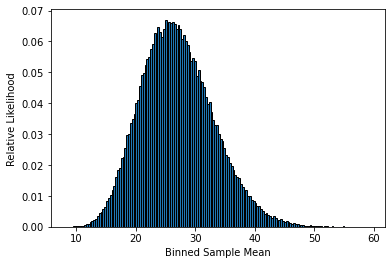

In [75]:
np.random.seed(0)
sample_means = [np.random.choice(fish_lengths,
                                size=20,
                                replace=True).mean()
               for _ in range(150000)]
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto',
                                      edgecolor='black', density=True)
plt.xlabel('Binned Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

In [76]:
assert abs(stats.skew(sample_means)) > 0.4

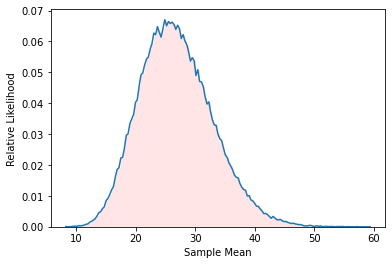

In [77]:
random_variable = stats.rv_histogram((likelihoods, bin_edges))
plt.plot(bin_edges, random_variable.pdf(bin_edges))
plt.hist(sample_means, bins='auto', alpha=0.1,  color='r', density=True)
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

Mean of the distribution is approximately 27.00 cm


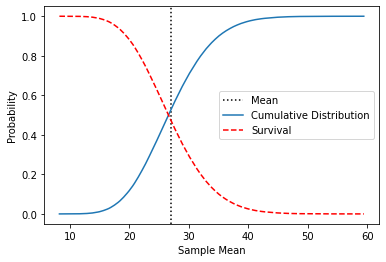

In [78]:
rv_mean = random_variable.mean()
print(f"Mean of the distribution is approximately {rv_mean:.2f} cm")

plt.axvline(random_variable.mean(), color='k', label='Mean', linestyle=':')
plt.plot(bin_edges, random_variable.cdf(bin_edges),
         label='Cumulative Distribution')
plt.plot(bin_edges, random_variable.sf(bin_edges),
         label='Survival', linestyle='--', color='r')
plt.xlabel('Sample Mean')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [79]:
prob_extreme= random_variable.sf(37) + random_variable.cdf(17)
print(f"Probability of observing an extreme sample mean is approximately {prob_extreme:.2f}")

Probability of observing an extreme sample mean is approximately 0.10


In [80]:
estimated_sem = random_variable.std()
p_value = compute_p_value(27, 37, estimated_sem)
print(f"P-value computed from estimated SEM is approximately {p_value:.2f}")

P-value computed from estimated SEM is approximately 0.10


In [81]:
number_extreme_values = 0
for sample_mean in sample_means:
    if not 17 < sample_mean < 37:
        number_extreme_values += 1

p_value =  number_extreme_values / len(sample_means)
print(f"P-value is approximately {p_value:.2f}")

P-value is approximately 0.10


<h2>7.4  Permutation Testing: Comparing Means of Samples when the Population Parameters are Unknown

In [83]:
new_fish_lengths = np.array([51, 46.5, 51.6, 47, 54.4, 40.5, 43, 43.1,
                             35.9, 47.0])
assert new_fish_lengths.mean() == 46
mean_diff = abs(new_fish_lengths.mean() - fish_lengths.mean())
print(f"There is a {mean_diff:.2f} cm difference between the two means")

There is a 19.00 cm difference between the two means


In [84]:
total_fish_lengths = np.hstack([fish_lengths, new_fish_lengths])
assert total_fish_lengths.size == 30
np.random.seed(0)
np.random.shuffle(total_fish_lengths)
random_20_fish_lengths = total_fish_lengths[:20]
random_10_fish_lengths = total_fish_lengths[20:]
mean_diff = random_20_fish_lengths.mean() - random_10_fish_lengths.mean()
print(f"The sampled difference between mean fish lengths is {mean_diff}")

The sampled difference between mean fish lengths is 14.329999999999998


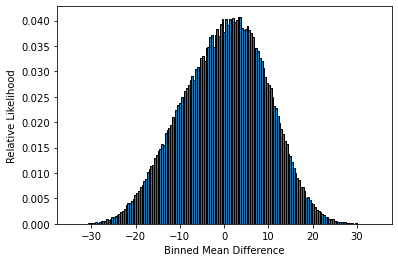

In [86]:
np.random.seed(0)
mean_diffs = []
for _ in range(300000):
    np.random.shuffle(total_fish_lengths)
    mean_diff = total_fish_lengths[:20].mean() - total_fish_lengths[20:].mean()
    mean_diffs.append(mean_diff)

likelihoods, bin_edges, _ = plt.hist(mean_diffs, bins='auto',
                                      edgecolor='black', density=True)
plt.xlabel('Binned Mean Difference')
plt.ylabel('Relative Likelihood')
plt.show()

In [87]:
random_variable = stats.rv_histogram((likelihoods, bin_edges))
p_value = random_variable.sf(19) + random_variable.cdf(-19)
print(f"P-value is approximately {p_value:.2f}")

P-value is approximately 0.04


In [88]:
number_extreme_values = 0.0
for min_diff in mean_diffs:
    if not -19 < min_diff < 19:
        number_extreme_values += 1

p_value =  number_extreme_values / len(mean_diffs)
print(f"P-value is approximately {p_value:.2f}")

P-value is approximately 0.04


<h1>8 Analyzing Tables Using Pandas

In [89]:
fish_measures = {'Fish': ['Angelfish', 'Zebrafish', 'Killifish', 'Swordtail'],
                 'Length':[15.2, 6.5, 9, 6],
                 'Width': [7.7, 2.1, 4.5, 2]}
zebrafish_index = fish_measures['Fish'].index('Zebrafish')
zebrafish_length = fish_measures['Length'][zebrafish_index]
print(f"The length of a zebrafish is {zebrafish_length:.2f} cm")

The length of a zebrafish is 6.50 cm


In [90]:
import pandas as pd
df = pd.DataFrame(fish_measures)
print(df)

        Fish  Length  Width
0  Angelfish    15.2    7.7
1  Zebrafish     6.5    2.1
2  Killifish     9.0    4.5
3  Swordtail     6.0    2.0


In [91]:
print(df.describe())

          Length     Width
count   4.000000  4.000000
mean    9.175000  4.075000
std     4.225616  2.678775
min     6.000000  2.000000
25%     6.375000  2.075000
50%     7.750000  3.300000
75%    10.550000  5.300000
max    15.200000  7.700000


In [92]:
print(df.mean())

Length    9.175
Width     4.075
dtype: float64


In [93]:
df.set_index('Fish', inplace=True)
print(df)

           Length  Width
Fish                    
Angelfish    15.2    7.7
Zebrafish     6.5    2.1
Killifish     9.0    4.5
Swordtail     6.0    2.0


In [94]:
print(df.loc[['Angelfish', 'Swordtail']])

           Length  Width
Fish                    
Angelfish    15.2    7.7
Swordtail     6.0    2.0


In [95]:
df_transposed = df.T
print(df_transposed)

Fish    Angelfish  Zebrafish  Killifish  Swordtail
Length       15.2        6.5        9.0        6.0
Width         7.7        2.1        4.5        2.0


In [96]:
df_transposed['Clownfish'] = [10.6, 3.7]
print(df_transposed)

Fish    Angelfish  Zebrafish  Killifish  Swordtail  Clownfish
Length       15.2        6.5        9.0        6.0       10.6
Width         7.7        2.1        4.5        2.0        3.7


In [97]:
df_new = df_transposed.assign(Clownfish2=[10.6, 3.7], Clownfish3=[10.6, 3.7])
assert 'Clownfish2' not in df_transposed.columns
assert 'Clownfish2' in df_new.columns
print(df_new)

Fish    Angelfish  Zebrafish  Killifish  Swordtail  Clownfish  Clownfish2  \
Length       15.2        6.5        9.0        6.0       10.6        10.6   
Width         7.7        2.1        4.5        2.0        3.7         3.7   

Fish    Clownfish3  
Length        10.6  
Width          3.7  


In [98]:
df_new.drop(columns=['Clownfish2', 'Clownfish3'], inplace=True)
print(df_new)

Fish    Angelfish  Zebrafish  Killifish  Swordtail  Clownfish
Length       15.2        6.5        9.0        6.0       10.6
Width         7.7        2.1        4.5        2.0        3.7


In [99]:
areas = []
for fish_species, (length, width) in df_new.items():
    area = math.pi * length * width / 4
    print(f"Area of {fish_species} is {area}")
    areas.append(area)

Area of Angelfish is 91.92300104403735
Area of Zebrafish is 10.720684930375171
Area of Killifish is 31.808625617596654
Area of Swordtail is 9.42477796076938
Area of Clownfish is 30.80331596844792


In [100]:
areas

[91.92300104403735,
 10.720684930375171,
 31.808625617596654,
 9.42477796076938,
 30.80331596844792]

In [101]:
df_new.loc['Area'] = areas
df_new.reindex()
print(df_new)

Fish    Angelfish  Zebrafish  Killifish  Swordtail  Clownfish
Length  15.200000   6.500000   9.000000   6.000000  10.600000
Width    7.700000   2.100000   4.500000   2.000000   3.700000
Area    91.923001  10.720685  31.808626   9.424778  30.803316


In [102]:
df_new.to_csv('Fish_measurements.csv')
with open('Fish_measurements.csv') as f:
    print(f.read())

,Angelfish,Zebrafish,Killifish,Swordtail,Clownfish
Length,15.2,6.5,9.0,6.0,10.6
Width,7.7,2.1,4.5,2.0,3.7
Area,91.92300104403735,10.720684930375171,31.808625617596654,9.42477796076938,30.80331596844792



In [103]:
df = pd.read_csv('Fish_measurements.csv', index_col=0)
print(df)
print("\nRow index names when column is assigned:")
print(df.index.values)

df_no_assign = pd.read_csv('Fish_measurements.csv')
print("\nRow index names when no column is assigned:")
print(df_no_assign.index.values)

        Angelfish  Zebrafish  Killifish  Swordtail  Clownfish
Length  15.200000   6.500000   9.000000   6.000000  10.600000
Width    7.700000   2.100000   4.500000   2.000000   3.700000
Area    91.923001  10.720685  31.808626   9.424778  30.803316

Row index names when column is assigned:
['Length' 'Width' 'Area']

Row index names when no column is assigned:
[0 1 2]


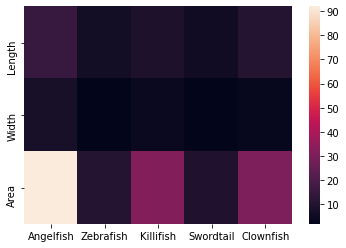

In [104]:
import seaborn as sns
sns.heatmap(df)
plt.show()

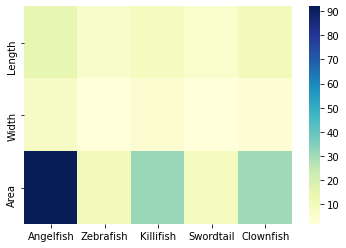

In [105]:
sns.heatmap(df, cmap='YlGnBu')
plt.show()

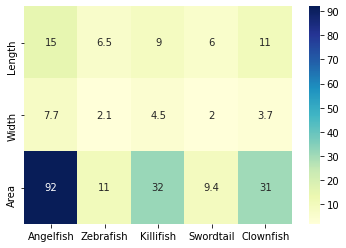

In [106]:
sns.heatmap(df, cmap='YlGnBu', annot=True)
plt.show()

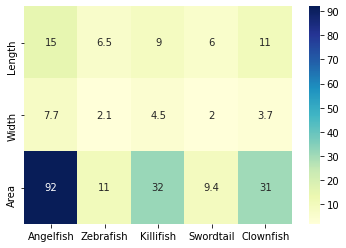

In [107]:
sns.heatmap(df, cmap='YlGnBu', annot=True)
plt.show()

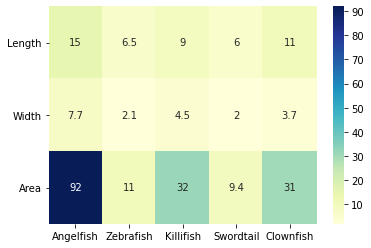

In [108]:
sns.heatmap(df.values,
            cmap='YlGnBu', annot=True,
            xticklabels=df.columns,
            yticklabels=df.index)
plt.yticks(rotation=0)
plt.show()

<h1>9 Case Study 2 Solution

In [109]:
df = pd.read_csv('colored_ad_click_table.csv')
num_rows, num_cols = df.shape
print(f"Table contains {num_rows} rows and {num_cols} columns")

Table contains 30 rows and 41 columns


In [110]:
print(df.columns)

Index(['Color', 'Click Count: Day 1', 'View Count: Day 1',
       'Click Count: Day 2', 'View Count: Day 2', 'Click Count: Day 3',
       'View Count: Day 3', 'Click Count: Day 4', 'View Count: Day 4',
       'Click Count: Day 5', 'View Count: Day 5', 'Click Count: Day 6',
       'View Count: Day 6', 'Click Count: Day 7', 'View Count: Day 7',
       'Click Count: Day 8', 'View Count: Day 8', 'Click Count: Day 9',
       'View Count: Day 9', 'Click Count: Day 10', 'View Count: Day 10',
       'Click Count: Day 11', 'View Count: Day 11', 'Click Count: Day 12',
       'View Count: Day 12', 'Click Count: Day 13', 'View Count: Day 13',
       'Click Count: Day 14', 'View Count: Day 14', 'Click Count: Day 15',
       'View Count: Day 15', 'Click Count: Day 16', 'View Count: Day 16',
       'Click Count: Day 17', 'View Count: Day 17', 'Click Count: Day 18',
       'View Count: Day 18', 'Click Count: Day 19', 'View Count: Day 19',
       'Click Count: Day 20', 'View Count: Day 20'],
      dtyp

In [112]:
print(df.Color.values)

['Pink' 'Gray' 'Sapphire' 'Purple' 'Coral' 'Olive' 'Navy' 'Maroon' 'Teal'
 'Cyan' 'Orange' 'Black' 'Tan' 'Red' 'Blue' 'Brown' 'Turquoise' 'Indigo'
 'Gold' 'Jade' 'Ultramarine' 'Yellow' 'Virdian' 'Violet' 'Green'
 'Aquamarine' 'Magenta' 'Silver' 'Bronze' 'Lime']


In [113]:
selected_columns = ['Color', 'Click Count: Day 1', 'View Count: Day 1']
print(df[selected_columns].describe())

       Click Count: Day 1  View Count: Day 1
count           30.000000               30.0
mean            23.533333              100.0
std              7.454382                0.0
min             12.000000              100.0
25%             19.250000              100.0
50%             24.000000              100.0
75%             26.750000              100.0
max             49.000000              100.0


In [114]:
view_columns = [column for column in df.columns if 'View' in column]
assert np.all(df[view_columns].values == 100)

In [115]:
df.drop(columns=view_columns, inplace=True)
print(df.columns)

Index(['Color', 'Click Count: Day 1', 'Click Count: Day 2',
       'Click Count: Day 3', 'Click Count: Day 4', 'Click Count: Day 5',
       'Click Count: Day 6', 'Click Count: Day 7', 'Click Count: Day 8',
       'Click Count: Day 9', 'Click Count: Day 10', 'Click Count: Day 11',
       'Click Count: Day 12', 'Click Count: Day 13', 'Click Count: Day 14',
       'Click Count: Day 15', 'Click Count: Day 16', 'Click Count: Day 17',
       'Click Count: Day 18', 'Click Count: Day 19', 'Click Count: Day 20'],
      dtype='object')


In [116]:
df.set_index('Color', inplace=True)
print(df.T.Blue.describe())

count    20.000000
mean     28.350000
std       5.499043
min      18.000000
25%      25.750000
50%      27.500000
75%      30.250000
max      42.000000
Name: Blue, dtype: float64


In [117]:
df_not_blue = df.T.drop(columns='Blue')
print(df_not_blue.head(2))

Color               Pink  Gray  Sapphire  Purple  Coral  Olive  Navy  Maroon  \
Click Count: Day 1    21    27        30      26     26     26    38      21   
Click Count: Day 2    20    27        32      21     24     19    29      29   

Color               Teal  Cyan  ...  Ultramarine  Yellow  Virdian  Violet  \
Click Count: Day 1    25    24  ...           49      14       27      15   
Click Count: Day 2    25    22  ...           41      24       23      22   

Color               Green  Aquamarine  Magenta  Silver  Bronze  Lime  
Click Count: Day 1     14          24       18      26      19    20  
Click Count: Day 2     25          28       21      24      19    19  

[2 rows x 29 columns]


In [118]:
def permutation_test(data_array_a, data_array_b):
    data_mean_a = data_array_a.mean()
    data_mean_b = data_array_b.mean()
    extreme_mean_diff = abs(data_mean_a - data_mean_b)
    total_data = np.hstack([data_array_a, data_array_b])
    number_extreme_values = 0.0
    for _ in range(30000):
        np.random.shuffle(total_data)
        sample_a = total_data[:data_array_a.size]
        sample_b = total_data[data_array_a.size:]
        if abs(sample_a.mean() - sample_b.mean())  >= extreme_mean_diff:
            number_extreme_values += 1

    p_value = number_extreme_values / 30000
    return p_value

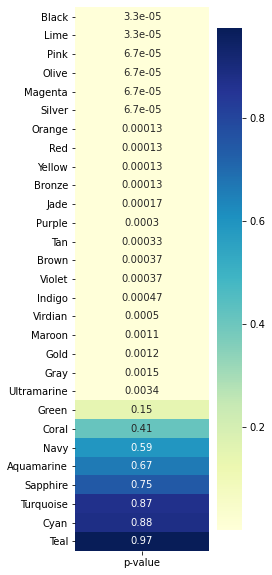

In [119]:
np.random.seed(0)
blue_clicks = df.T.Blue.values
color_to_p_value = {}
for color, color_clicks in df_not_blue.items():
    p_value = permutation_test(blue_clicks, color_clicks)
    color_to_p_value[color] = p_value

sorted_colors, sorted_p_values = zip(*sorted(color_to_p_value.items(),
                                             key=lambda x: x[1]))
plt.figure(figsize=(3, 10))
sns.heatmap([[p_value] for p_value in sorted_p_values],
            cmap='YlGnBu', annot=True, xticklabels=['p-value'],
            yticklabels=sorted_colors)
plt.show()

In [120]:
remaining_colors = df[df.T.mean().values > blue_clicks.mean()].index
size = remaining_colors.size
print(f"{size} colors have on average more clicks than Blue.")
print("These colors are:")
print(remaining_colors.values)

5 colors have on average more clicks than Blue.
These colors are:
['Sapphire' 'Navy' 'Teal' 'Ultramarine' 'Aquamarine']


In [121]:
for color, p_value in sorted(color_to_p_value.items(), key=lambda x: x[1]):
    if color in remaining_colors:
        mean = df_not_blue[color].mean()
        print(f"{color} has a p-value of {p_value} and a mean of {mean}")

Ultramarine has a p-value of 0.0034 and a mean of 34.2
Navy has a p-value of 0.5911666666666666 and a mean of 29.3
Aquamarine has a p-value of 0.6654666666666667 and a mean of 29.2
Sapphire has a p-value of 0.7457666666666667 and a mean of 28.9
Teal has a p-value of 0.9745 and a mean of 28.45


In [122]:
significance_level = 0.05 / 29
print(f"Adjusted significance level is {significance_level}")
if color_to_p_value['Ultramarine'] <= significance_level:
    print("Our p-value is statistically significant")
else:
    print("Our p-value is not statistically significant")

Adjusted significance level is 0.001724137931034483
Our p-value is not statistically significant


In [123]:
hypothetical_sig_level = 0.05 / 5
print(f"Hypothetical significance level is {hypothetical_sig_level}")
if color_to_p_value['Ultramarine'] <= hypothetical_sig_level:
    print("Our hypothetical p-value would have been statistically significant")
else:
    print("Our hypothetical p-value would not not have been statistically significant")

Hypothetical significance level is 0.01
Our hypothetical p-value would have been statistically significant
